# Outlier detection techniques

- Visualizing the data using a box plot, histogram, distribution plot or scatter plot
- Domain knowledge
- IQR method (suitable for any distribution)
- Percentile capping 
- Z-score method OR standard deviation (suitable for normally distributed data)

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('Data/weight-height.xls')
df.drop('Weight', axis=1, inplace=True)
df.head()

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


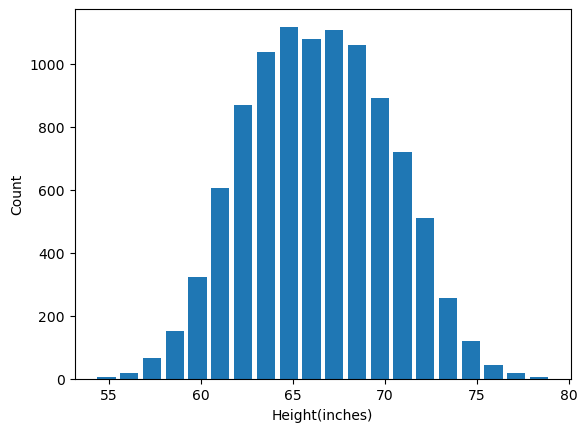

In [11]:
plt.hist(df.Height, bins=20, rwidth=0.8)
plt.xlabel('Height(inches)')
plt.ylabel('Count')
plt.show()

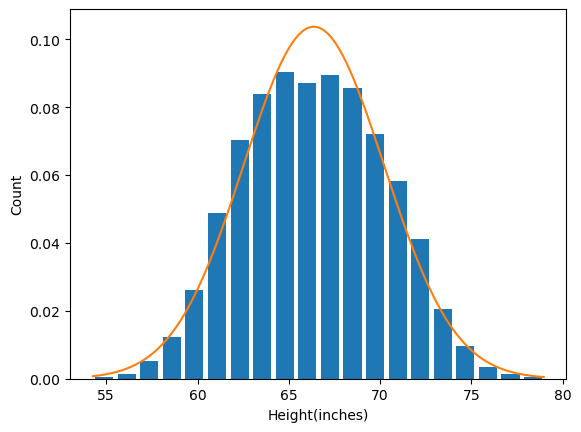

In [14]:
#to include the bell curve

from scipy.stats import norm
import numpy as np

plt.hist(df.Height, bins=20, rwidth=0.8, density = True)
plt.xlabel('Height(inches)')
plt.ylabel('Count')

#plotting the bell curve
rng = np.arange(df.Height.min(), df.Height.max(), 0.1)
plt.plot(rng, norm.pdf(rng, df.Height.mean(), df.Height.std()))

plt.show()

## Using standard deviation

Standard deviation shows you how far away a data point is from the mean value.

In [15]:
df.Height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

Using the three standard deviation to remove outliers from the data. This is the most used.

In [18]:
#figuring out the upper limit
upper_limit = df.Height.mean()+3*df.Height.std()
upper_limit

77.91014411714076

Now any value above 77.91 can be marked as an outlier.

In [19]:
#figuring out the lower limit
lower_limit = df.Height.mean()-3*df.Height.std()
lower_limit

54.82497539250136

Any value below 54.82 can be marked as an outlier.

In [21]:
df[(df.Height>upper_limit) | (df.Height<lower_limit)]

,Gender,Height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


These values may be valid heights of individuals. But since it is very different from the rest it is important that you address them because they can hamper the accuracy of your model. What you can do is to discuss your outlier results with your business manager or refer back to the business problem.

In [24]:
##removing the outliers

new_df = df[(df.Height<upper_limit) & (df.Height>lower_limit)]
new_df

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


## Using Z-score

Z score gives you a number which tells you how many stabard deviation you are away from the mean. E.g if a data point is 3 standard deviation from the mean, then the z-score is 3.

$$ \frac{x-{\mu}}{{\sigma}} = Z $$

Where x = the data point
      mu = the mean
      sigma = standard deviation

In [25]:
df['zscore'] = (df.Height - df.Height.mean())/df.Height.std()
df

,Gender,Height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


In [26]:
#Now we can filter out rows that have a z-score below -3 and above 3
df[df['zscore']>3]

,Gender,Height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [27]:
df[df['zscore']<-3]

,Gender,Height,zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [32]:
new_df2 = df[(df['zscore'] > -3) & (df['zscore']<3)]
new_df2

,Gender,Height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


## Using IQR technique

To use this technique you need to understand percentiles.

In [37]:
df.Height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

Here: 

`min (0th percentile) = 54.2`

0% of the data is below that value

`25th percentile(Q1) = 63.5`

This means 25% of the data are below/less than this value.

`50th percentile(Q2) = 66.3`

50% of the data are below this value.

`75th percentile(Q3) = 69.1`

75% of the data are below this value.

`max (100th percentile) = 78.9`

100% of the data is below that value

**Calulating the IQR**

`IQR = Q3 -Q1`

**To remove outliers, you need upper and lower limit.**

`lower_limit = Q1-1.5*1QR`

`upper_limit = Q3+1.5*IQR`

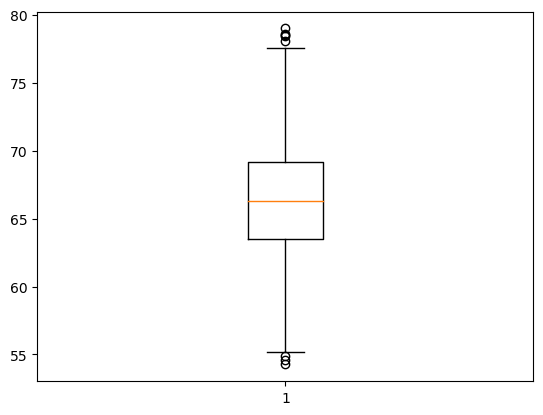

In [36]:
plt.boxplot(df.Height)
plt.show()

In [41]:
Q1 = df['Height'].quantile(0.25)
Q3 = df['Height'].quantile(0.75)

Q1, Q3

(63.505620481218955, 69.1742617268347)

In [44]:
IQR = Q3-Q1
IQR

5.668641245615746

In [46]:
lower_limit = Q1 - 1.5*IQR

upper_limit = Q3 + 1.5*IQR

lower_limit, upper_limit

(55.00265861279534, 77.67722359525831)

In [47]:
df[(df.Height<lower_limit) | (df.Height>upper_limit)]

,Gender,Height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
7294,Female,54.873728,-2.987329
9285,Female,54.263133,-3.146027


In [49]:
new_df3 = df[(df.Height>lower_limit) & (df.Height<upper_limit)]
new_df3

,Gender,Height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


## Using Percentile

This can be seen as percentile capping where we define thresholds according to the percentiles we want and then use it to filter thd data. This is especially useful when you have domain knowledge.

In [56]:
max_threshold = df['Height'].quantile(0.95)
max_threshold

72.61710606642384

In [52]:
df[df['Height']>max_threshold]

,Gender,Height,zscore
0,Male,73.847017,1.943964
2,Male,74.110105,2.012343
23,Male,75.205974,2.297167
27,Male,72.800844,1.672056
31,Male,74.033808,1.992512
...,...,...,...
4975,Male,73.339590,1.812080
4977,Male,74.043290,1.994977
4989,Male,72.726342,1.652693
4994,Male,73.092871,1.747956


In [53]:
min_threshold = df['Height'].quantile(0.5)
min_threshold

66.31807008178464

In [54]:
df[df['Height']<min_threshold]

,Gender,Height,zscore
9,Male,63.456494,-0.756607
12,Male,64.766329,-0.416171
17,Male,63.974326,-0.622019
22,Male,66.149132,-0.056771
38,Male,65.807316,-0.145611
...,...,...,...
9993,Female,60.030434,-1.647064
9994,Female,59.098250,-1.889345
9995,Female,66.172652,-0.050658
9997,Female,63.867992,-0.649655


In [57]:
new_df4 = df[(df.Height>min_threshold) & (df.Height<max_threshold)]
new_df4

,Gender,Height,zscore
1,Male,68.781904,0.627505
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
5,Male,67.253016,0.230136
6,Male,68.785081,0.628331
...,...,...,...
9969,Female,68.202385,0.476884
9982,Female,69.868511,0.909922
9985,Female,68.041065,0.434956
9996,Female,67.067155,0.181830


In [59]:
df = pd.read_csv('Data/bhp.csv')
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [61]:
df.shape

(13200, 7)

In [62]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [63]:
min_threshold, max_threshold = df.price_per_sqft.quantile([0.001, 0.999])
min_threshold, max_threshold

(1366.184, 50959.36200000098)

In [64]:
df[df['price_per_sqft']<min_threshold]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
5343,other,9 BHK,42000.0,8.0,175.0,9,416
5417,Ulsoor,4 BHK,36000.0,4.0,450.0,4,1250
5597,JP Nagar,2 BHK,1100.0,1.0,15.0,2,1363
7166,Yelahanka,1 Bedroom,26136.0,1.0,150.0,1,573
7862,JP Nagar,3 BHK,20000.0,3.0,175.0,3,875


In [65]:
df[df['price_per_sqft']>max_threshold]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1005,other,1 BHK,15.0,1.0,30.0,1,200000
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
5911,Mysore Road,1 Bedroom,45.0,1.0,23.0,1,51111
6356,Bommenahalli,4 Bedroom,2940.0,3.0,2250.0,4,76530
7012,other,1 BHK,650.0,1.0,500.0,1,76923
7575,other,1 BHK,425.0,1.0,750.0,1,176470
7799,other,4 BHK,2000.0,3.0,1063.0,4,53150


In [66]:
new_df5 = df[(df['price_per_sqft']>min_threshold) & (df['price_per_sqft']<max_threshold)]
new_df5

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [67]:
#randomly sampling some rows from the data
new_df5.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
6317,Kaggadasapura,3 BHK,1500.0,3.0,75.00,3,5000
4637,Ramamurthy Nagar,9 Bedroom,2000.0,9.0,150.00,9,7500
11990,Thanisandra,3 BHK,1806.0,6.0,116.00,3,6423
4048,Neeladri Nagar,2 BHK,1060.0,2.0,35.00,2,3301
2262,Begur Road,2 BHK,1200.0,2.0,37.80,2,3149
7392,Hosa Road,3 BHK,1533.0,3.0,98.18,3,6404
11132,2nd Stage Nagarbhavi,4 Bedroom,1500.0,3.0,230.00,4,15333
2055,Kanakpura Road,2 BHK,900.0,2.0,41.00,2,4555
1357,Lingadheeranahalli,3 BHK,1519.0,3.0,93.00,3,6122
7792,other,4 Bedroom,1200.0,3.0,180.00,4,15000


### What is feature engineering?

This is the process of extracting useful features from raw data using math, statistics and domain knowledge.